# House Price Prediction

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns

In [75]:
# data = pd.read_csv("train.csv")

data = pd.read_csv("train.csv",index_col="Id")

In [76]:
# Drop missing value
data.fillna(value=-99999, inplace=True)

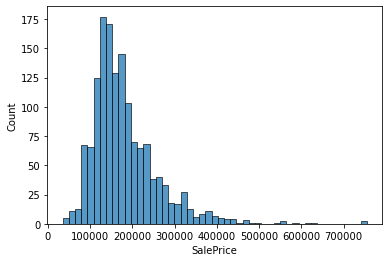

In [79]:
sns.histplot(data=data["SalePrice"]);

In [ ]:
# data.columns

## Choose features

In [ ]:
features = ["LotArea","YearBuilt","1stFlrSF","2ndFlrSF","FullBath","BedroomAbvGr","TotRmsAbvGrd"]
target = "SalePrice"

## Split dataset

In [ ]:
X = data[features]
y = data[target]

In [ ]:
# Scale the X so that everyone can have the same distribution for linear regression
# from sklearn import preprocessing
# X = preprocessing.StandardScaler().fit_transform(X)
# X = pd.DataFrame(X)

In [ ]:
# X.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.85,test_size=0.15,random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,train_size=0.85,test_size=0.15,random_state=0)

## Training with Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
linear = LinearRegression()
linear.fit(X_train,y_train)

poly = PolynomialFeatures()
poly.fit(X_train,y_train)

PolynomialFeatures()

In [ ]:
# y_pred = linear.predict(X_valid)
# pd.DataFrame({'y': y_valid,'y_pred': y_pred})

## Precision

In [ ]:
# y_pred1 = linear.predict(X_test)
# pd.DataFrame({'y': y_test,'y_pred1': y_pred1})

In [ ]:
acc_linear_train = linear.score(X_train, y_train)
acc_linear_val = linear.score(X_valid, y_valid)
acc_linear_test = linear.score(X_test, y_test)

print(acc_linear_train)
print(acc_linear_val)
print(acc_linear_test)

0.6894380462383987
0.7468114007293976
0.7309556391681727


## Training with Polynomial Regression

In [86]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit(X_train,y_train)
x_poly = poly.fit_transform(X_train)

# Fit the Polynomial Regression Model
PolyReg = LinearRegression()
PolyReg.fit(x_poly, y_train) 

LinearRegression()

In [87]:
from sklearn.metrics import r2_score
#Accurate on training set
y_check_train = PolyReg.predict(poly.fit_transform(X_train))
accu_train = r2_score(y_train, y_check_train)
#Accurate on validation set
y_check_val = PolyReg.predict(poly.fit_transform(X_valid))
accu_val = r2_score(y_valid, y_check_val)
#Accurate on test set
y_check_test= PolyReg.predict(poly.fit_transform(X_test))
accu_test = r2_score(y_test, y_check_test)

print(accu_train)
print(accu_val)
print(accu_test)

0.818148892537453
0.7552766226861908
0.8084820196148943


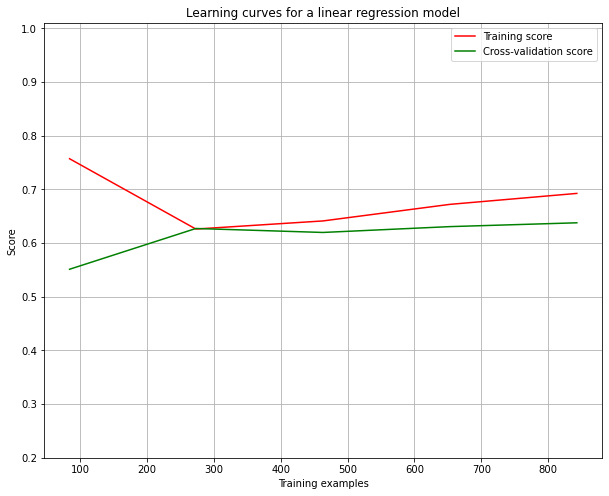

In [89]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize = (10,8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    # plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
    #                  train_scores_mean + train_scores_std, alpha=0.1,
    #                  color="r")
    # plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
    #                  test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

    return plt

plot_learning_curve(LinearRegression(), "Learning curves for a linear regression model", X_train, y_train, (0.2, 1.01), cv=5, n_jobs=4);

In [ ]:
# from sklearn.model_selection import learning_curve
# import matplotlib.pyplot as plt

# train_sizes = [1, 100, 200, 300, 400, 500]
# def learning_curves(estimator, data, features, target, train_sizes, cv):
#     train_sizes, train_scores, validation_scores = learning_curve(
#     estimator, data[features], data[target], train_sizes =
#     train_sizes,
#     cv = cv, scoring = 'neg_mean_squared_error')
#     train_scores_mean = -train_scores.mean(axis = 1)
#     validation_scores_mean = -validation_scores.mean(axis = 1)

#     plt.plot(train_sizes, train_scores_mean, label = 'Training error')
#     plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

#     plt.ylabel('MSE', fontsize = 14)
#     plt.xlabel('Training set size', fontsize = 14)
#     title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
#     plt.title(title, fontsize = 18, y = 1.03)
#     plt.legend()
#     plt.ylim(0,10)
    
# plt.figure(figsize = (16,10))



# learning_curves(LinearRegression(), data, features, target, train_sizes, 5)